<a href="https://colab.research.google.com/github/hallowerised/Twitter-Sentiment-Analysis/blob/main/Copy_of_twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be DOWNGRADED:
  libcudnn8
0 upgraded, 0 newly installed, 1 downgraded, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 1,392 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 9s (47.8 MB/s)
(Reading database ... 124016 files and directories currently installed.)
Removing libcudnn8-dev (8.1.1.33-1+cuda11.2) ...
update-alternatives: removing manually selected alternative - switching libcudnn to auto mode
dpkg: warning: downgrading libcudnn8 from 8.1.1.33-1+cuda11.2 to

In [106]:
TF_ENABLE_ONEDNN_OPTS=0
TF_DISABLE_MKL=1

In [1]:
import pandas as pd
from google.colab import files
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
train = pd.read_csv('train.csv', on_bad_lines='skip')
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [6]:
sentiment = { 1: 'Hate', 0: 'Non-Hate'}
def label_decoder(label):
    return sentiment[label]

train.label = train.label.apply(lambda x : label_decoder(x))
train.head(10)

,id,label,tweet
0,1,Non-Hate,@user when a father is dysfunctional and is s...
1,2,Non-Hate,@user @user thanks for #lyft credit i can't us...
2,3,Non-Hate,bihday your majesty
3,4,Non-Hate,#model i love u take with u all the time in ...
4,5,Non-Hate,factsguide: society now #motivation
5,6,Non-Hate,[2/2] huge fan fare and big talking before the...
6,7,Non-Hate,@user camping tomorrow @user @user @user @use...
7,8,Non-Hate,the next school year is the year for exams.ð...
8,9,Non-Hate,we won!!! love the land!!! #allin #cavs #champ...
9,10,Non-Hate,@user @user welcome here ! i'm it's so #gr...


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


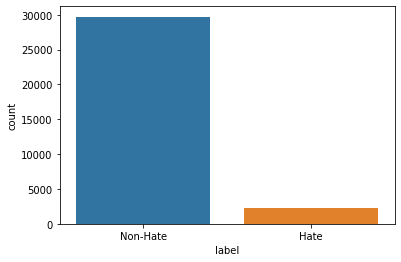

In [7]:

plt.figure()
sns.countplot(train['label'])

In [8]:
stop_words = stopwords.words('english')
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [9]:
stemmer = SnowballStemmer('english')
text_cleaning_re = '@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'

In [10]:
def preprocess(text, stem = False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens =[]
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return ' '.join(tokens)

In [11]:
train.tweet[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [12]:
preprocess(train.tweet[0], True)



'user father dysfunct selfish drag kid dysfunct run'

In [79]:
from sklearn.model_selection import train_test_split
Train_size = 0.8

In [80]:
train_data, test_data = train_test_split(train, test_size = 1 - Train_size, random_state = 5)

In [88]:
train_data.head()

,id,label,tweet
27496,27497,Non-Hate,scout meetings are sometimes some of the best ...
10705,10706,Non-Hate,littleteensasha - to fulfill all your desire a...
21199,21200,Non-Hate,off to this with @user tonight ð
24590,24591,Non-Hate,happy bihday sirjee bihdayelectroman @user...
850,851,Non-Hate,just the 2 of usâ£â£â£â£â£â£â£ #me #sel...


In [81]:
print('size of training data :', len(train_data))
print('size of testing data :',len(test_data))

size of training data : 25569
size of testing data : 6393


In [13]:
uploaded2 = files.upload()

Saving test.csv to test.csv


In [14]:
print('size of training data :', len(train))
test = pd.read_csv('test.csv', on_bad_lines='skip')

print('size of testing data :',len(test))

size of training data : 31962
size of testing data : 17197


In [89]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.tweet)

word_index = tokenizer.word_index
vocab_size = len(word_index)
print('VOCAB_SIZE :', vocab_size)

VOCAB_SIZE : 39654


In [16]:
!pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pad-sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10216 sha256=e45b0d4b5844d70813a352a04f947aacf24754f8e49159c6a538b56759955f4c
  Stored in directory: /root/.cache/pip/wheels/51/e4/5c/d3610ed4476515e540ff4096e3e9a8a3e701dedfe1072eb000
Successfully built pad-sequences


In [91]:
from keras_preprocessing.sequence import pad_sequences

Max_NB_words = 100000
Max_sq_length = 30
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet), maxlen = Max_sq_length)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet), maxlen = Max_sq_length)

print('training x shape :', x_train.shape)
print('testing x shape :', x_test.shape)

training x shape : (25569, 30)
testing x shape : (6393, 30)


In [92]:
encoder = LabelEncoder()
encoder.fit(train.label.to_list())

y_train = encoder.transform(train_data.label.tolist())
y_test = encoder.transform(test_data.label.tolist())

print('y_train shape :', y_train.shape)


y_train shape : (25569,)


In [94]:
y_train = y_train.reshape(25569,1)
print('y_train shape :', y_train.shape)
y_test = y_test.reshape(6393,1)
print('y_test shape :', y_test.shape)

y_train shape : (25569, 1)
y_test shape : (6393, 1)


In [20]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-01-02 19:21:13--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-01-02 19:21:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-01-02 19:21:13--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [21]:
GLOVE_EMB = './glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 20
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [95]:
embeddings_index = {}
file = open(GLOVE_EMB)
for line in file:
    values = line.split()
    word = value = values[0]
    coef = np.asarray(values[1:],dtype = 'float32')
    embeddings_index[word] = coef
    
file.close()
print('Found {} word vectors'.format(len(embeddings_index)))

Found 400000 word vectors


In [23]:
list(embeddings_index.items())[0]

('the', array([ 4.6560e-02,  2.1318e-01, -7.4364e-03, -4.5854e-01, -3.5639e-02,
         2.3643e-01, -2.8836e-01,  2.1521e-01, -1.3486e-01, -1.6413e+00,
        -2.6091e-01,  3.2434e-02,  5.6621e-02, -4.3296e-02, -2.1672e-02,
         2.2476e-01, -7.5129e-02, -6.7018e-02, -1.4247e-01,  3.8825e-02,
        -1.8951e-01,  2.9977e-01,  3.9305e-01,  1.7887e-01, -1.7343e-01,
        -2.1178e-01,  2.3617e-01, -6.3681e-02, -4.2318e-01, -1.1661e-01,
         9.3754e-02,  1.7296e-01, -3.3073e-01,  4.9112e-01, -6.8995e-01,
        -9.2462e-02,  2.4742e-01, -1.7991e-01,  9.7908e-02,  8.3118e-02,
         1.5299e-01, -2.7276e-01, -3.8934e-02,  5.4453e-01,  5.3737e-01,
         2.9105e-01, -7.3514e-03,  4.7880e-02, -4.0760e-01, -2.6759e-02,
         1.7919e-01,  1.0977e-02, -1.0963e-01, -2.6395e-01,  7.3990e-02,
         2.6236e-01, -1.5080e-01,  3.4623e-01,  2.5758e-01,  1.1971e-01,
        -3.7135e-02, -7.1593e-02,  4.3898e-01, -4.0764e-02,  1.6425e-02,
        -4.4640e-01,  1.7197e-01,  4.6246e-0

In [96]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [97]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                           EMBEDDING_DIM,
                                           weights = [embedding_matrix],
                                           input_length = Max_sq_length,
                                           trainable = False)

In [98]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                           EMBEDDING_DIM,
                                           weights = [embedding_matrix],
                                           input_length = Max_sq_length,
                                           trainable = False)


In [99]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [100]:
sequence_input = Input(shape = (Max_sq_length), dtype = 'int32')
embedding_sequences = embedding_layer(sequence_input)
x= SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation = 'relu')(x)
x = Bidirectional(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2))(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)
 # here we arranged layer for our neural network.

In [101]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding_9 (Embedding)     (None, 30, 300)           11896200  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 30, 300)          0         
 lDropout1D)                                                     
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 64)            96064     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 512)               6604

In [102]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [109]:
model.compile(optimizer = Adam(learning_rate = LR),
             loss ='binary_crossentropy',
             metrics = ['accuracy'])

LR_reduction = ReduceLROnPlateau(factor = 0.1,
                                min_lr = 0.0001,
                                monitor = 'val_loss',
                                verbose = 1)

In [111]:
history = model.fit(x_train,
                   y_train,
                   batch_size = BATCH_SIZE,
                   epochs = EPOCHS,
                   validation_data = (x_test, y_test),
                   callbacks = [LR_reduction])

Epoch 1/20
23/25 [==========================>...] - ETA: 2s - loss: 0.1844 - accuracy: 0.9307

InvalidArgumentError: ignored